In [10]:
import tensorflow.keras as tk


In [11]:
data = tk.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

print(len(train_images), len(test_images))

60000 10000


In [13]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


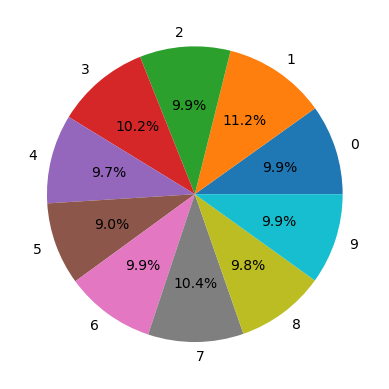

In [23]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, values_count = np.unique(train_labels, return_counts=True)

plt.pie(values_count, labels=unique_values, autopct='%1.1f%%')
plt.show()

In [24]:
print(train_images[0].shape)

(28, 28)


In [27]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

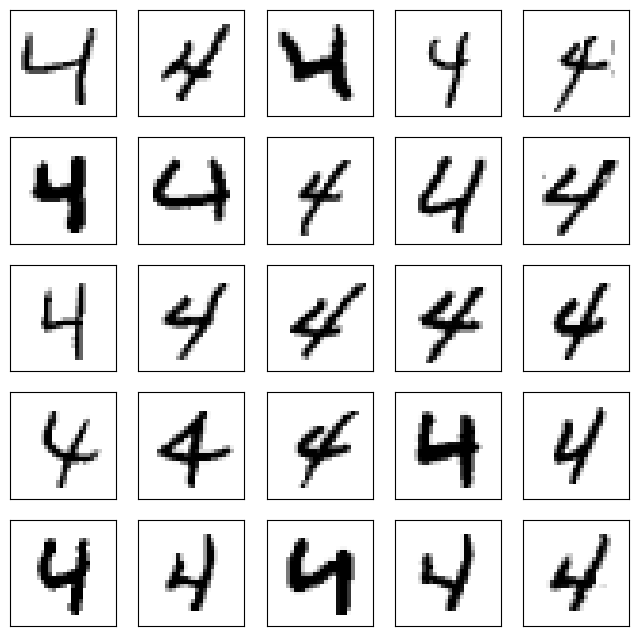

In [28]:
max_4 = 25
images_4 = []
for i in range(len(train_labels)):
    if train_labels[i] == 4:
        images_4.append(train_images[i])
        if len(images_4) == max_4:
            break

rows = 5 
cols = 5

plt.figure(figsize=(8, 8))
for i in range (max_4):
    plt.subplot(rows, cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_4[i], cmap=plt.cm.binary)

plt.show()

In [29]:
train_images = train_images / 255.0
test_images = test_images / 255.0

model = tk.Sequential([
    tk.layers.Flatten(input_shape=(28, 28)),
    tk.layers.Dense(units=512, activation='relu'), 
    tk.layers.Dense(units=256, activation='relu'), 
    tk.layers.Dense(units=128, activation='relu'), 
    tk.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9000 - loss: 0.3222
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9725 - loss: 0.0879
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9808 - loss: 0.0594
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9868 - loss: 0.0426
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9884 - loss: 0.0370
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9902 - loss: 0.0302
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9934 - loss: 0.0219
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9928 - loss: 0.0227
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9935 - loss: 0.0205
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9941 - loss: 0.0189


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy; ', test_acc)
print('Test loss; ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.0917
Test Accuracy;  0.9829000234603882
Test loss;  0.07715121656656265


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


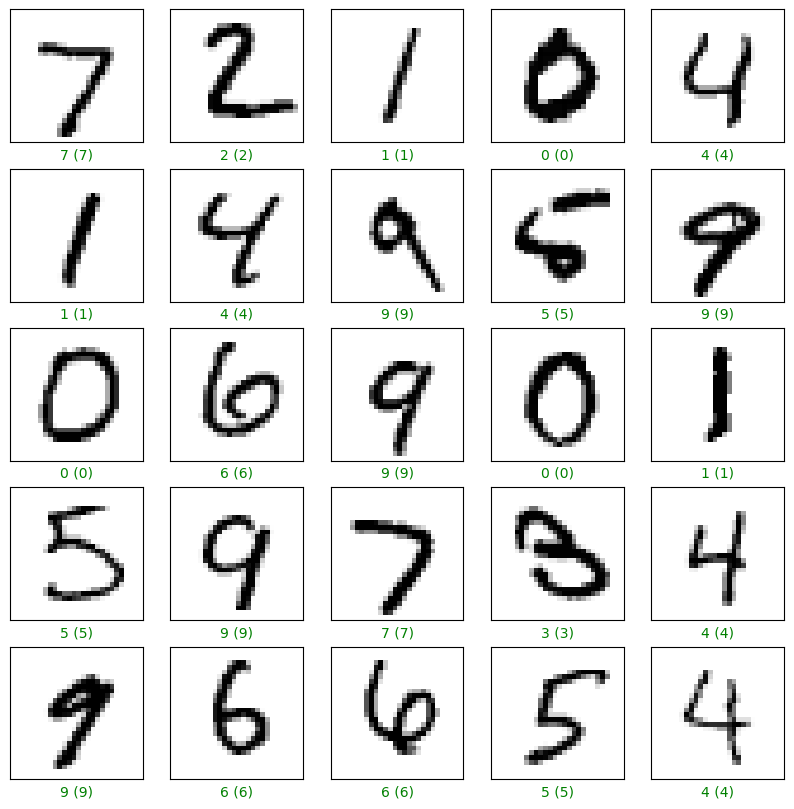

In [34]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel('{} ({})'.format(predicted_label, true_label), color=color)

plt.show()